# Pymaceuticals Inc.
---

### Analysis
Hello, please run this code to get the same graphs and charts in the solution for differnet drug regimens. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_df= pd.merge(study_results, mouse_metadata, on= 'Mouse ID', how = 'outer')

# Display the data table for preview
mouse_df.head()

# Checking the number of mice.
mouse_df['Mouse ID'].nunique()

249

In [2]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df_dupe = mouse_df[mouse_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]

mouse_df_dupe.head()                       

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   

        Sex  Age_months  Weight (g)  
860  Female          21          26  
861  Female          21          26  
862  Female          21          26  
863  Female          21          26  
864  Female          21          26

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df_dupe.head()    

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   

        Sex  Age_months  Weight (g)  
860  Female          21          26  
861  Female          21          26  
862  Female          21          26  
863  Female          21          26  
864  Female          21          26

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_df[mouse_df['Mouse ID'] != 'g989']



In [5]:
# Checking the number of mice in the clean DataFrame.
mouse_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_mean = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
drug_med = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
drug_var = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
drug_std = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
drug_sem = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
drug_sum_table = pd.DataFrame({'Mean Tumor Volume': drug_mean, 'Median Tumor Volume': drug_med, 'Tumor Volume Variance': drug_var, 'Tumor Volume Std Dev': drug_std, 'Tumor Volume Std. Err.': drug_sem})
drug_sum_table


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std Dev  Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                 4.994774                0.329346  
Ceftamin                  6.268188                0.469821  
Infubinol                 6.567243                0.492236  
Ketapril                  8.279709                0.603860  
Naftisol                  8.134708                0.596466  
Placebo                   7.821003                0.581331  
Propriva                  6.622085                0.544332  
Ramicane                  4.846308                0.320955  
Stelasyn                  7.710419                0.573111  
Zoniferol                 6.966589                0.516398

In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_sum_table2 = mouse_clean.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

drug_sum_table2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

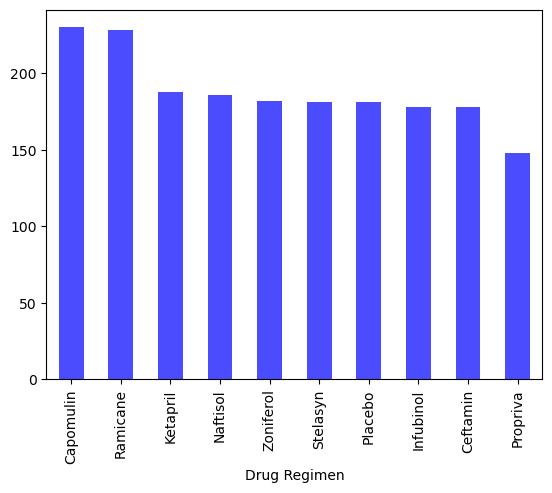

<Figure size 640x480 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_drug_count = mouse_clean['Drug Regimen'].value_counts()
count_chart = mouse_drug_count.plot.bar(x='mouse_drug_count[0]', y='mouse_drug_count[1]', color='blue', alpha= 0.7)
plt.show()
plt.tight_layout()


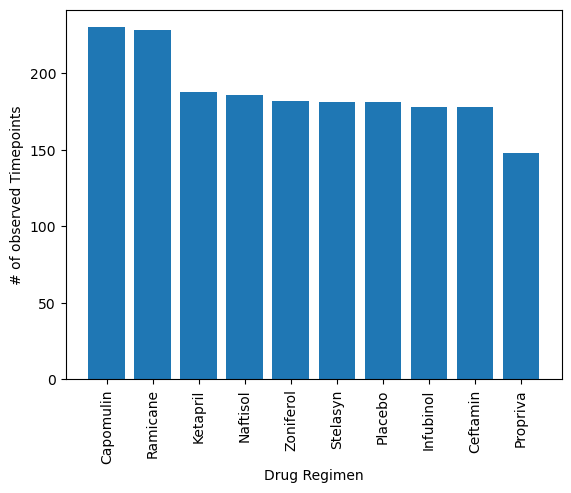

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mouse_drug_count.index.values, mouse_drug_count.values)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('# of observed Timepoints')
plt.show()

<Axes: ylabel='count'>

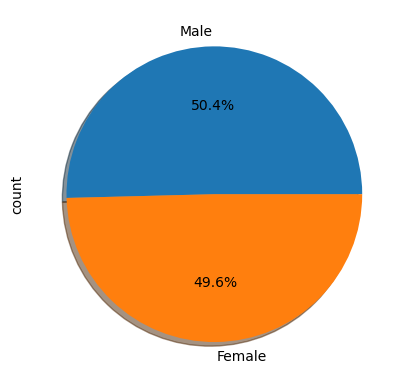

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_count = mouse_clean[['Mouse ID', 'Sex']].drop_duplicates(keep= 'first')
mouse_sex_count = mouse_sex_count['Sex'].value_counts()
mouse_sex_count.plot(kind = 'pie', y= 'Sex', autopct='%1.1f%%', shadow = True)

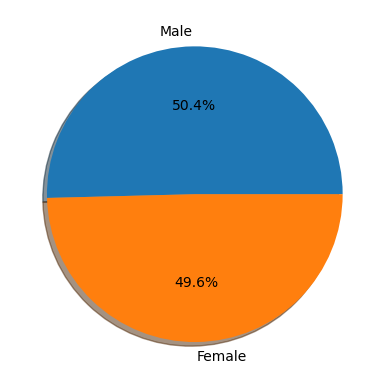

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = mouse_sex_count.index.values
mouse_sex_amt = mouse_sex_count.values
plt.pie(mouse_sex_amt, labels = mouse_sex, autopct='%1.1f%%', shadow = True)
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_clean_filtered = mouse_clean[mouse_clean['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
last_measure= mouse_clean_filtered.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()
last_measure = last_measure.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_measure= pd.merge(last_measure, mouse_clean_filtered, on=['Timepoint', 'Mouse ID', 'Drug Regimen'], how='inner')

last_measure.head()

Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
0     a203    Infubinol         45           67.973419                 2   
1     a251    Infubinol         45           65.525743                 1   
2     a275     Ceftamin         45           62.999356                 3   
3     a411     Ramicane         45           38.407618                 1   
4     a444     Ramicane         45           43.047543                 0   

      Sex  Age_months  Weight (g)  
0  Female          20          23  
1  Female          21          25  
2  Female          20          28  
3    Male           3          22  
4  Female          10          25

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_by_treat = {}

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

for treatment in treatment_list:
    final_tumor_vol = last_measure.loc[last_measure['Drug Regimen']==treatment, 'Tumor Volume (mm3)']
    tumor_vol.append(final_tumor_vol)
    tumor_vol_by_treat[treatment]= final_tumor_vol
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq= quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5* iqr)
    outliers =final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{treatment}'s potentional outliers: {outliers}")
    



Capomulin's potentional outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potentional outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potentional outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potentional outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


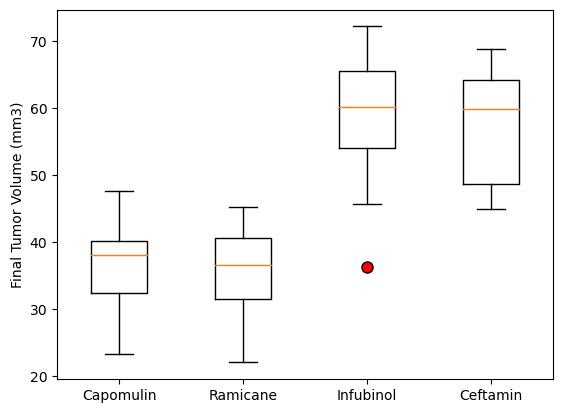

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

orange_out = dict(markerfacecolor='red',markersize=8)
plt.boxplot(tumor_vol, labels= treatment_list, flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show() 


## Line and Scatter Plots

In [15]:
#The following portion requires we only use data from Capomulin, the below code asks for input 
# and assigns the chocie of drug to a variable so we can run the analysis on any drug in the 4 choice regimen 
#I could easily make this work for all the drug regimens in the study

drug_entry = input("What Drug would you like to seee an analysis of? \nA: Capomulin \nB: Ramicane \nC: Infubinol \nD: Ceftamin\n")

while True:
    if drug_entry.upper() == 'A':
        drug_choice = 'Capomulin', 
        break
    elif drug_entry.upper() == 'B':
        drug_choice='Ramicane'
        break
    elif drug_entry.upper() == 'C':
        drug_choice='Infubinol'
        break
    elif drug_entry.upper() == 'D':
        drug_choice='Ceftamin'
        break
    else:
        print("I'm sorry, that's not a vaild choice")
        drug_entry = input('Please choose A, B, C, or D \nA: Capomulin \nB: Ramicane \nC: Infubinol \nD: Ceftamin')


What Drug would you like to seee an analysis of? 
A: Capomulin 
B: Ramicane 
C: Infubinol 
D: Ceftamin
d


In [16]:
just_one_drug = mouse_clean.loc[mouse_clean['Drug Regimen'] == drug_choice]
just_one_drug
#mouse_clean

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1304     x822          0           45.000000                 0     Ceftamin   
1305     x822          5           45.671104                 1     Ceftamin   
1306     x822         10           48.983717                 1     Ceftamin   
1307     x822         15           49.694665                 1     Ceftamin   
1308     x822         20           51.914910                 2     Ceftamin   
...       ...        ...                 ...               ...          ...   
1645     q483         25           52.430066                 1     Ceftamin   
1646     q483         30           54.952226                 1     Ceftamin   
1647     q483         35           59.253484                 1     Ceftamin   
1648     q483         40           64.192341                 1     Ceftamin   
1649     t573          0           45.000000                 0     Ceftamin   

         Sex  Age_months  Weight (g)  
1304    Male           3          29  
1305    Male           3          29  
1306    Male           3          29  
1307    Male           3          29  
1308    Male           3          29  
...      ...         ...         ...  
1645    Male           6          26  
1646    Male           6          26  
1647    Male           6          26  
1648    Male           6          26  
1649  Female          15          27  

[178 rows x 8 columns]

Text(0.5, 1.0, 'Tumor volume by time for Mouse ID q483 treated with Ceftamin')

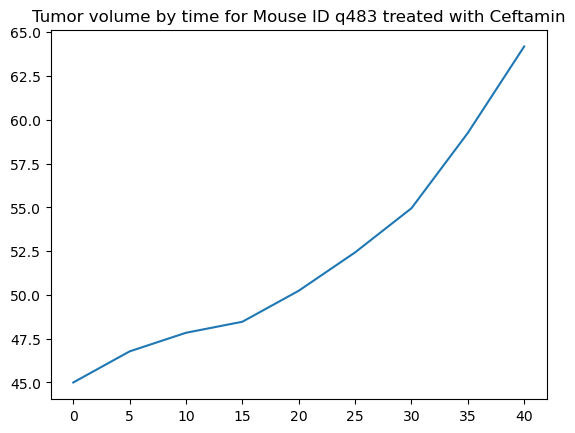

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#randomize the choice of mouse to show the treat, thanks to 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html
mouse_choice = just_one_drug['Mouse ID'].sample().values[0]


M_data =  just_one_drug.loc[just_one_drug['Mouse ID']== mouse_choice]
#print(f'Tumor volume by time for Mouse ID {mouse_choice} treated with {drug_choice}')
plt.plot(M_data['Timepoint'], M_data['Tumor Volume (mm3)'])
plt.title(f'Tumor volume by time for Mouse ID {mouse_choice} treated with {drug_choice}')

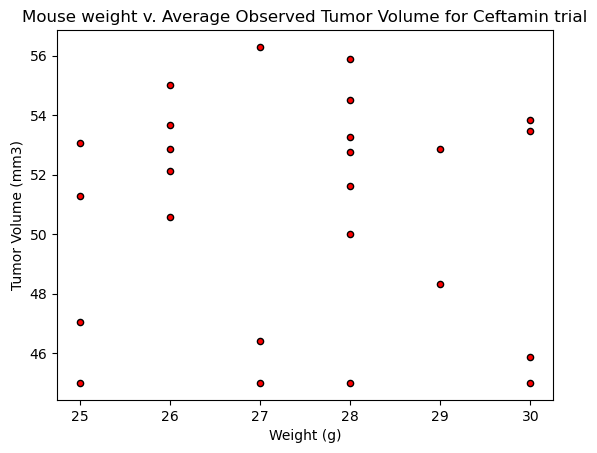

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
line_graph_data = just_one_drug.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

ax1 = line_graph_data.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', color = 'red', edgecolors= 'black', title=(f'Mouse weight v. Average Observed Tumor Volume for {drug_choice} trial'))

## Correlation and Regression

The correlation between mouse weight and the average tumor for the drug Ceftamin is 0.01


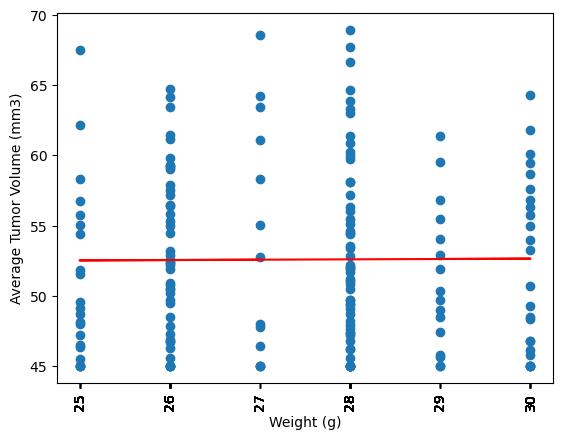

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight = just_one_drug['Weight (g)']
tumor_size = just_one_drug['Tumor Volume (mm3)']

correlation = st.pearsonr(weight, tumor_size)

print(f"The correlation between mouse weight and the average tumor for the drug {drug_choice} is {round(correlation[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(weight, tumor_size)

pe_fit = pe_slope * weight + pe_int


plt.scatter(weight, tumor_size)
plt.plot(weight,pe_fit, color = 'red')
plt.xticks(weight, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
